# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_47531/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

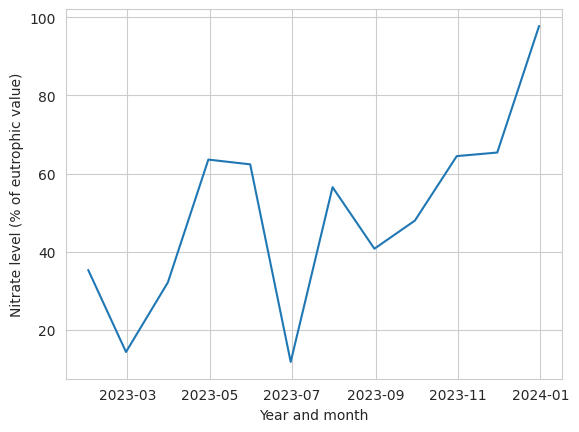

In [28]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_47531/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

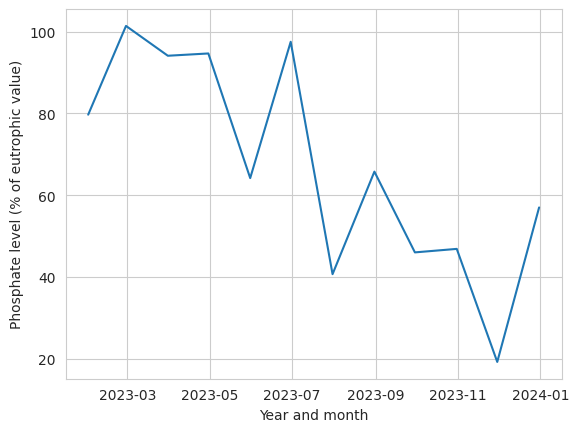

In [29]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

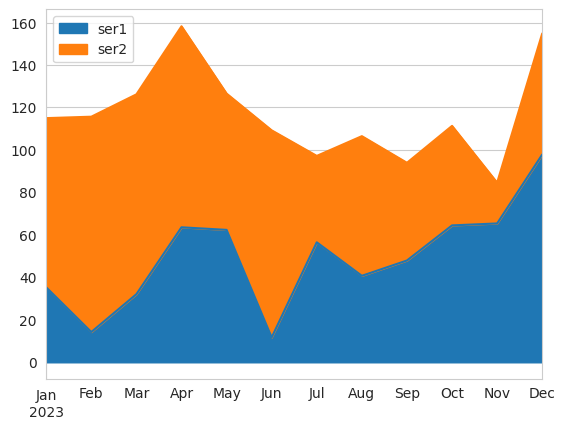

In [30]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Advantages of an area plot:

It stands out more visually and makes the data feel more dynamic or engaging.

It helps show the total amount of both nitrate and phosphate together, especially if the plot is stacked.

It can highlight how much each contributes to the overall level of pollution.

Disadvantages of an area plot:

It can get confusing when the two variables overlap, especially if the colors aren’t different enough or if the transparency is not adjusted.

It's harder to see the individual trends and compare the two lines directly.

The values can be harder to read if one line is covering the other.

Advantages of using two line graphs:

It's way easier to compare the trends side by side, and you can clearly see how each one is changing over time. Since the lines don’t overlap, the graph looks cleaner and less confusing.

Disadvantages of line graphs:

Line graphs are not always the most exciting to look at, and they don’t really show the total impact of both variables combined, like an area plot can.

To improve the presentation of either graph, I would pick colors that stand out from each other, make sure everything is labeled clearly, and for area plots, I would adjust the transparency so nothing gets hidden. Adding a title and making sure the axes are labeled consistently would also make it easier to understand.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.) 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

df.columns = df.columns.str.strip()
print("\nData types:")
print(df.dtypes)

print("\nMissing values (Top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10)) 


Dataset shape: (1659, 54)

First 5 rows:
   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  Heav

correlations between pairs of variables

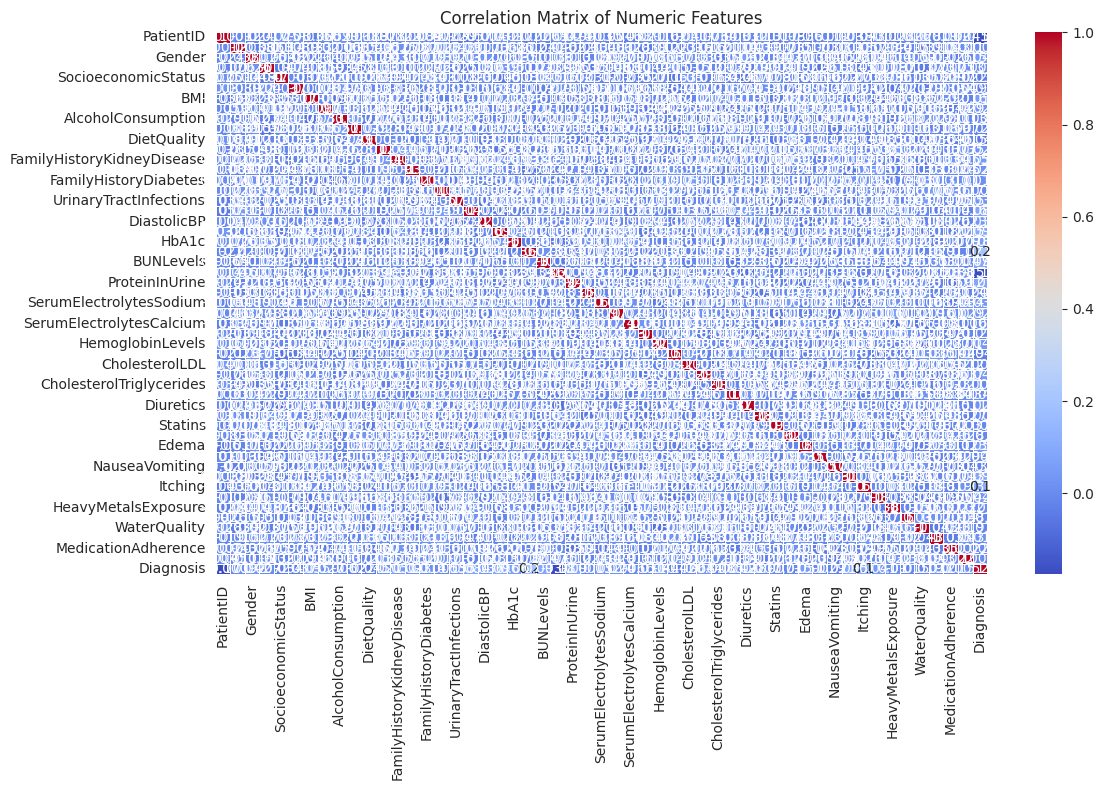

In [32]:

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        pass
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show() 

scatterplots, especially when the correlation is large

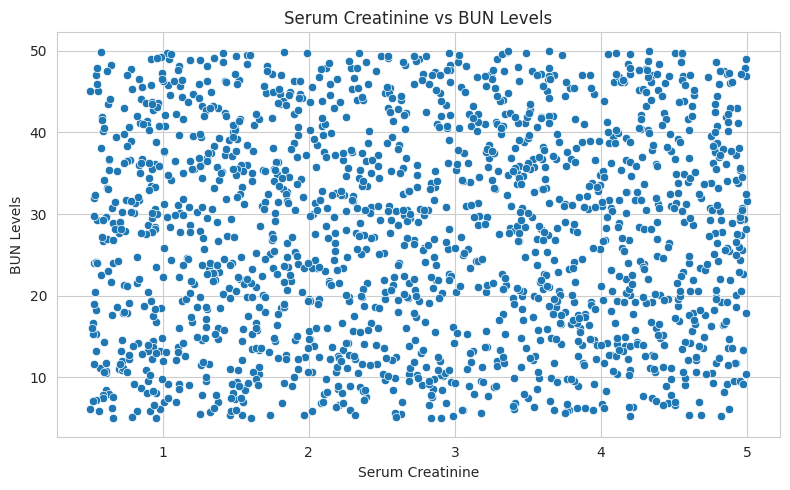

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'SerumCreatinine' in df.columns and 'BUNLevels' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='SerumCreatinine', y='BUNLevels')
    plt.title("Serum Creatinine vs BUN Levels")
    plt.xlabel("Serum Creatinine")
    plt.ylabel("BUN Levels")
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in the dataset.") 

Pairplots

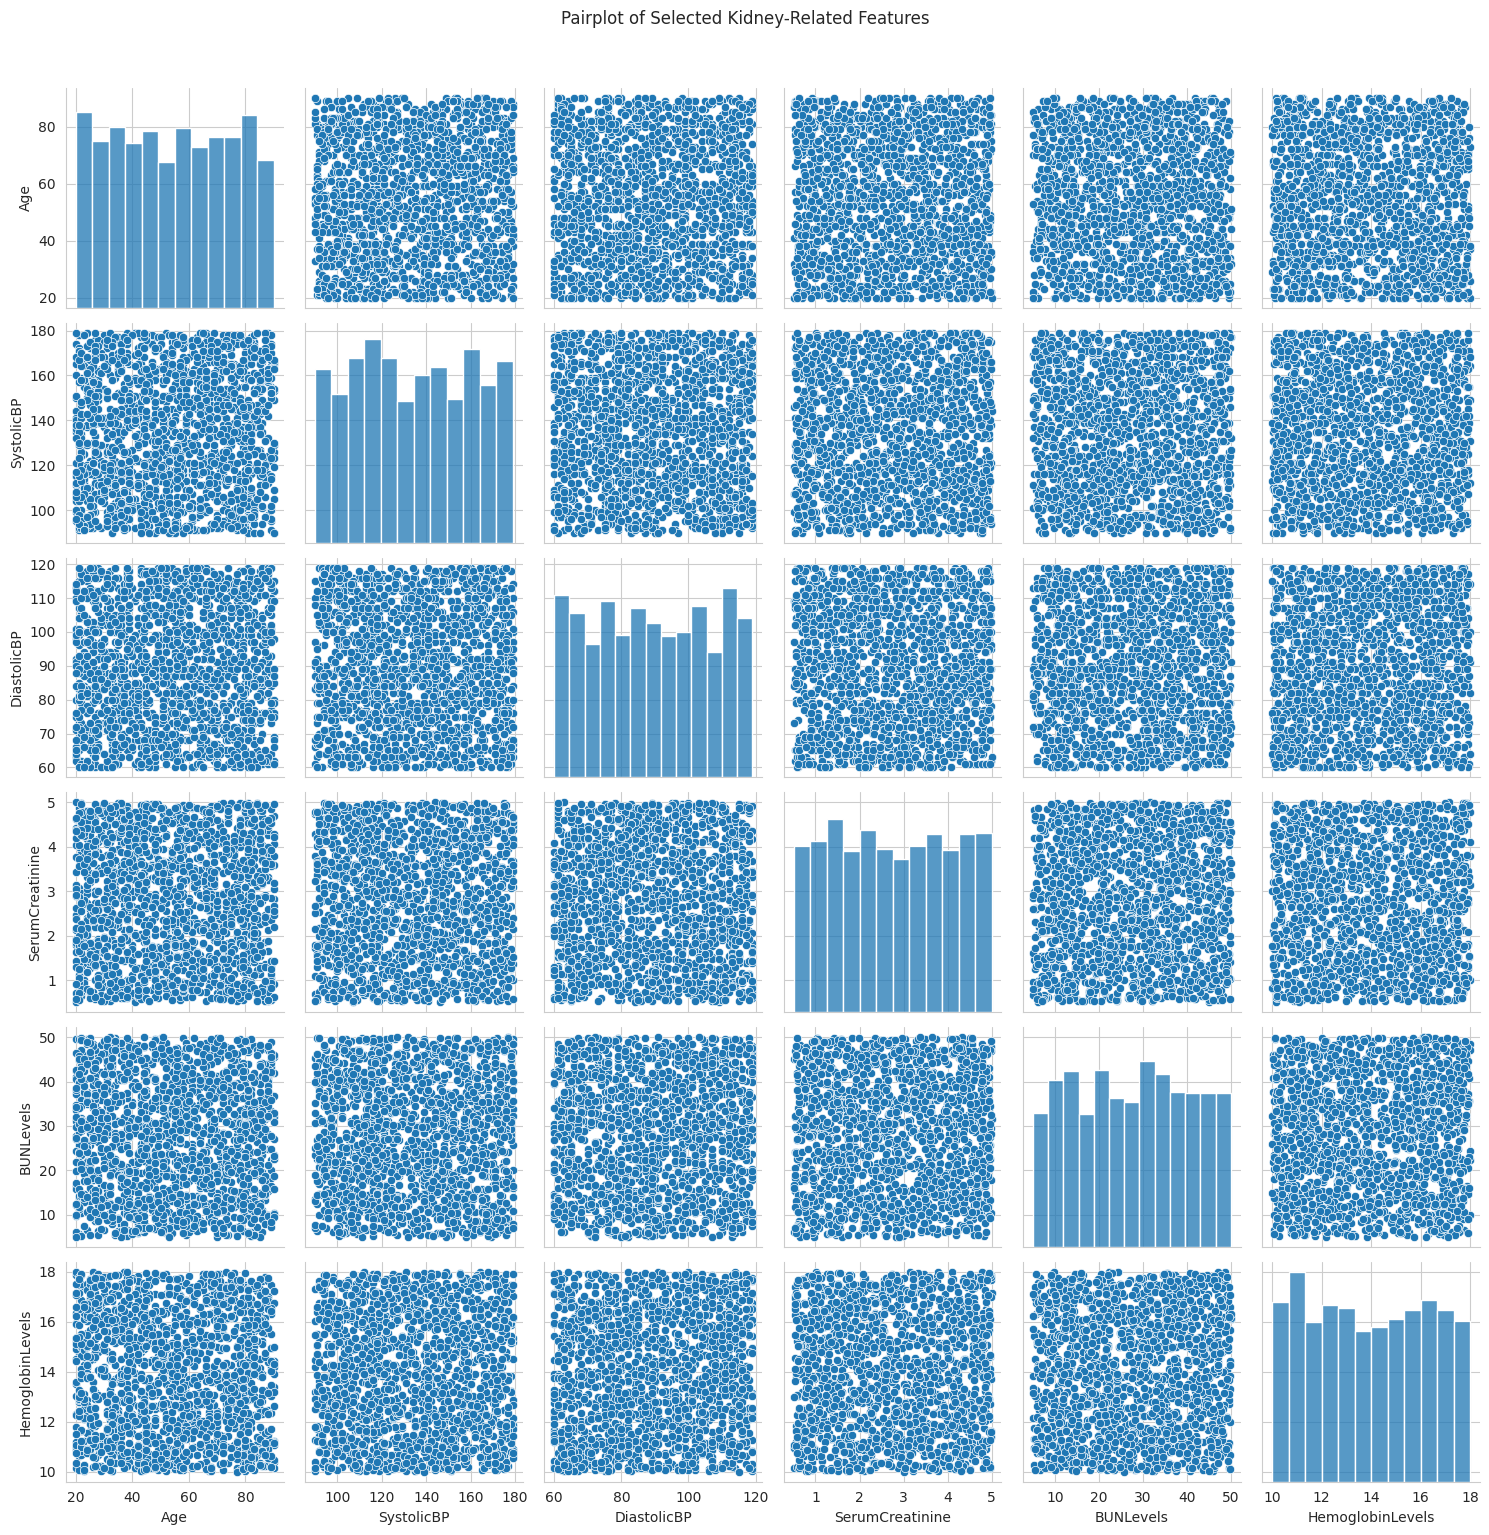

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'SerumCreatinine', 'BUNLevels', 'HemoglobinLevels']
pairplot_data = df[selected_cols].dropna()
sns.pairplot(pairplot_data)
plt.suptitle("Pairplot of Selected Kidney-Related Features", y=1.02)
plt.tight_layout()
plt.show() 

line graphs and/or area graphs when there is date or time data together with numerical data

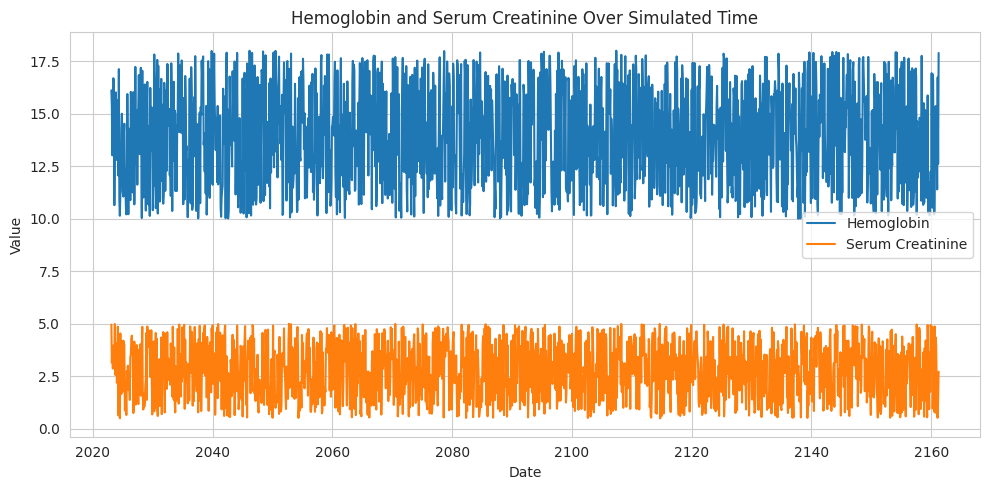

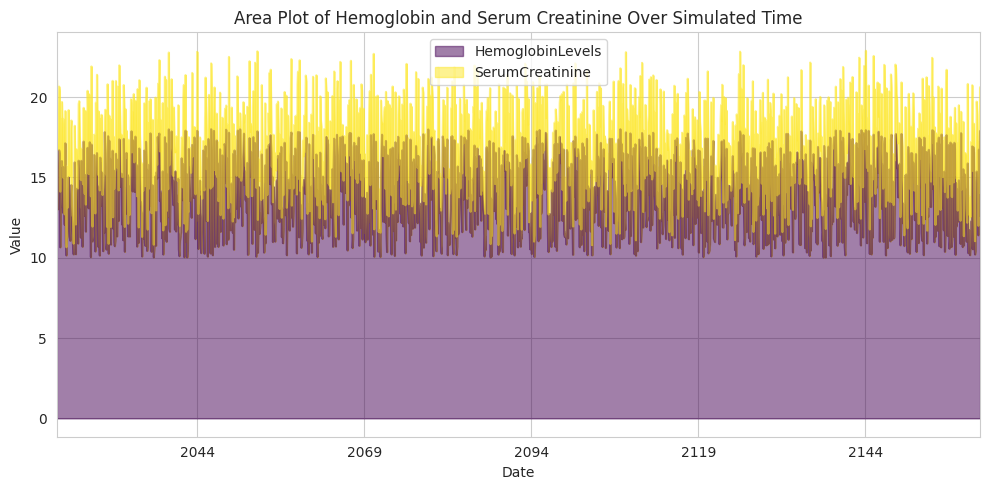

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df[['SerumCreatinine', 'HemoglobinLevels']].dropna().reset_index(drop=True)
num_points = len(df_subset)
date_range = pd.date_range(start='2023-01-01', periods=num_points, freq='ME')  # <- updated here
df_subset['Date'] = date_range

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_subset, x='Date', y='HemoglobinLevels', label='Hemoglobin')
sns.lineplot(data=df_subset, x='Date', y='SerumCreatinine', label='Serum Creatinine')
plt.title("Hemoglobin and Serum Creatinine Over Simulated Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

df_subset.set_index('Date')[['HemoglobinLevels', 'SerumCreatinine']].plot.area(
    alpha=0.5, figsize=(10, 5), cmap='viridis'
)
plt.title("Area Plot of Hemoglobin and Serum Creatinine Over Simulated Time")
plt.ylabel("Value")
plt.tight_layout()
plt.show() 

Conclusions

The data looks mostly like what I expected. It has lots of useful info about patients and their kidney health. Even though some data is missing, the important parts looked at are very much complete and good enough to work with.

I did see some outliers—data points that are way different from the others. For example, some people had really high values for serum creatinine and BUN levels. These might be real cases or maybe mistakes, so they’re worth checking.

Some variables are very closely related, like serum creatinine and BUN levels. That makes sense because both show how well the kidneys are working. They might give similar info and could be a bit repetitive.

There could be other things affecting the results. For example, age or having diabetes might affect kidney health and the measurements seen in the dataset. Also, medicines people take can change their lab results. Some of this info is in the dataset, but not everything.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

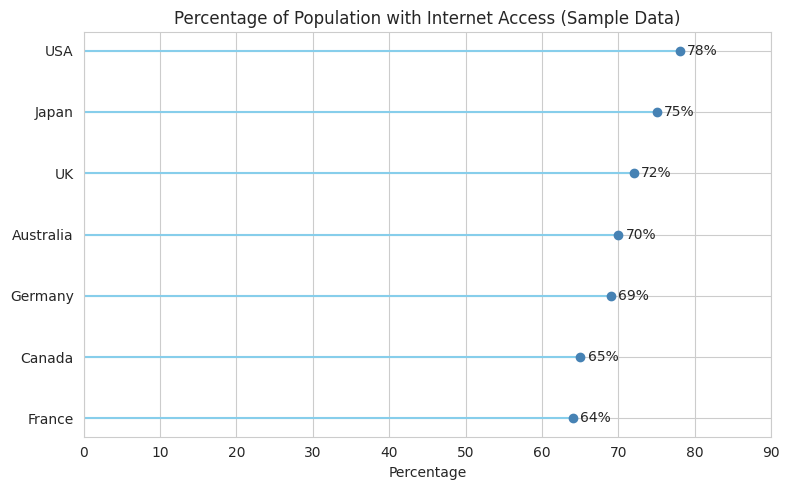

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = {
    "Country": ["USA", "Canada", "UK", "Germany", "France", "Japan", "Australia"],
    "Percentage": [78, 65, 72, 69, 64, 75, 70]
}

df = pd.DataFrame(data)
df = df.sort_values("Percentage")

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

plt.hlines(y=df["Country"], xmin=0, xmax=df["Percentage"], color='skyblue')
plt.plot(df["Percentage"], df["Country"], "o", color='steelblue')

for x, y in zip(df["Percentage"], df["Country"]):
    plt.text(x + 1, y, f"{x}%", va='center')

plt.xlabel("Percentage")
plt.title("Percentage of Population with Internet Access (Sample Data)")
plt.xlim(0, 90)
plt.tight_layout()
plt.show() 
